In [68]:
# https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
import seaborn as sns

In [2]:
df_graph = pd.read_csv('withFollowRetweet.csv')

In [3]:
normal_nodes = pd.read_csv('normal_nodes.csv')
abuse_nodes = pd.read_csv('abuse_nodes.csv')

normal_nodes['abuse'] = normal_nodes['racism'] + normal_nodes['sexism']
abuse_nodes['abuse'] = abuse_nodes['racism'] + abuse_nodes['sexism']

In [4]:
normal_data = df_graph[df_graph['source'].isin(list(normal_nodes['user_id'])) & df_graph['target'].isin(list(normal_nodes['user_id']))]
normal_data.to_csv('normal_data.csv',index=False)

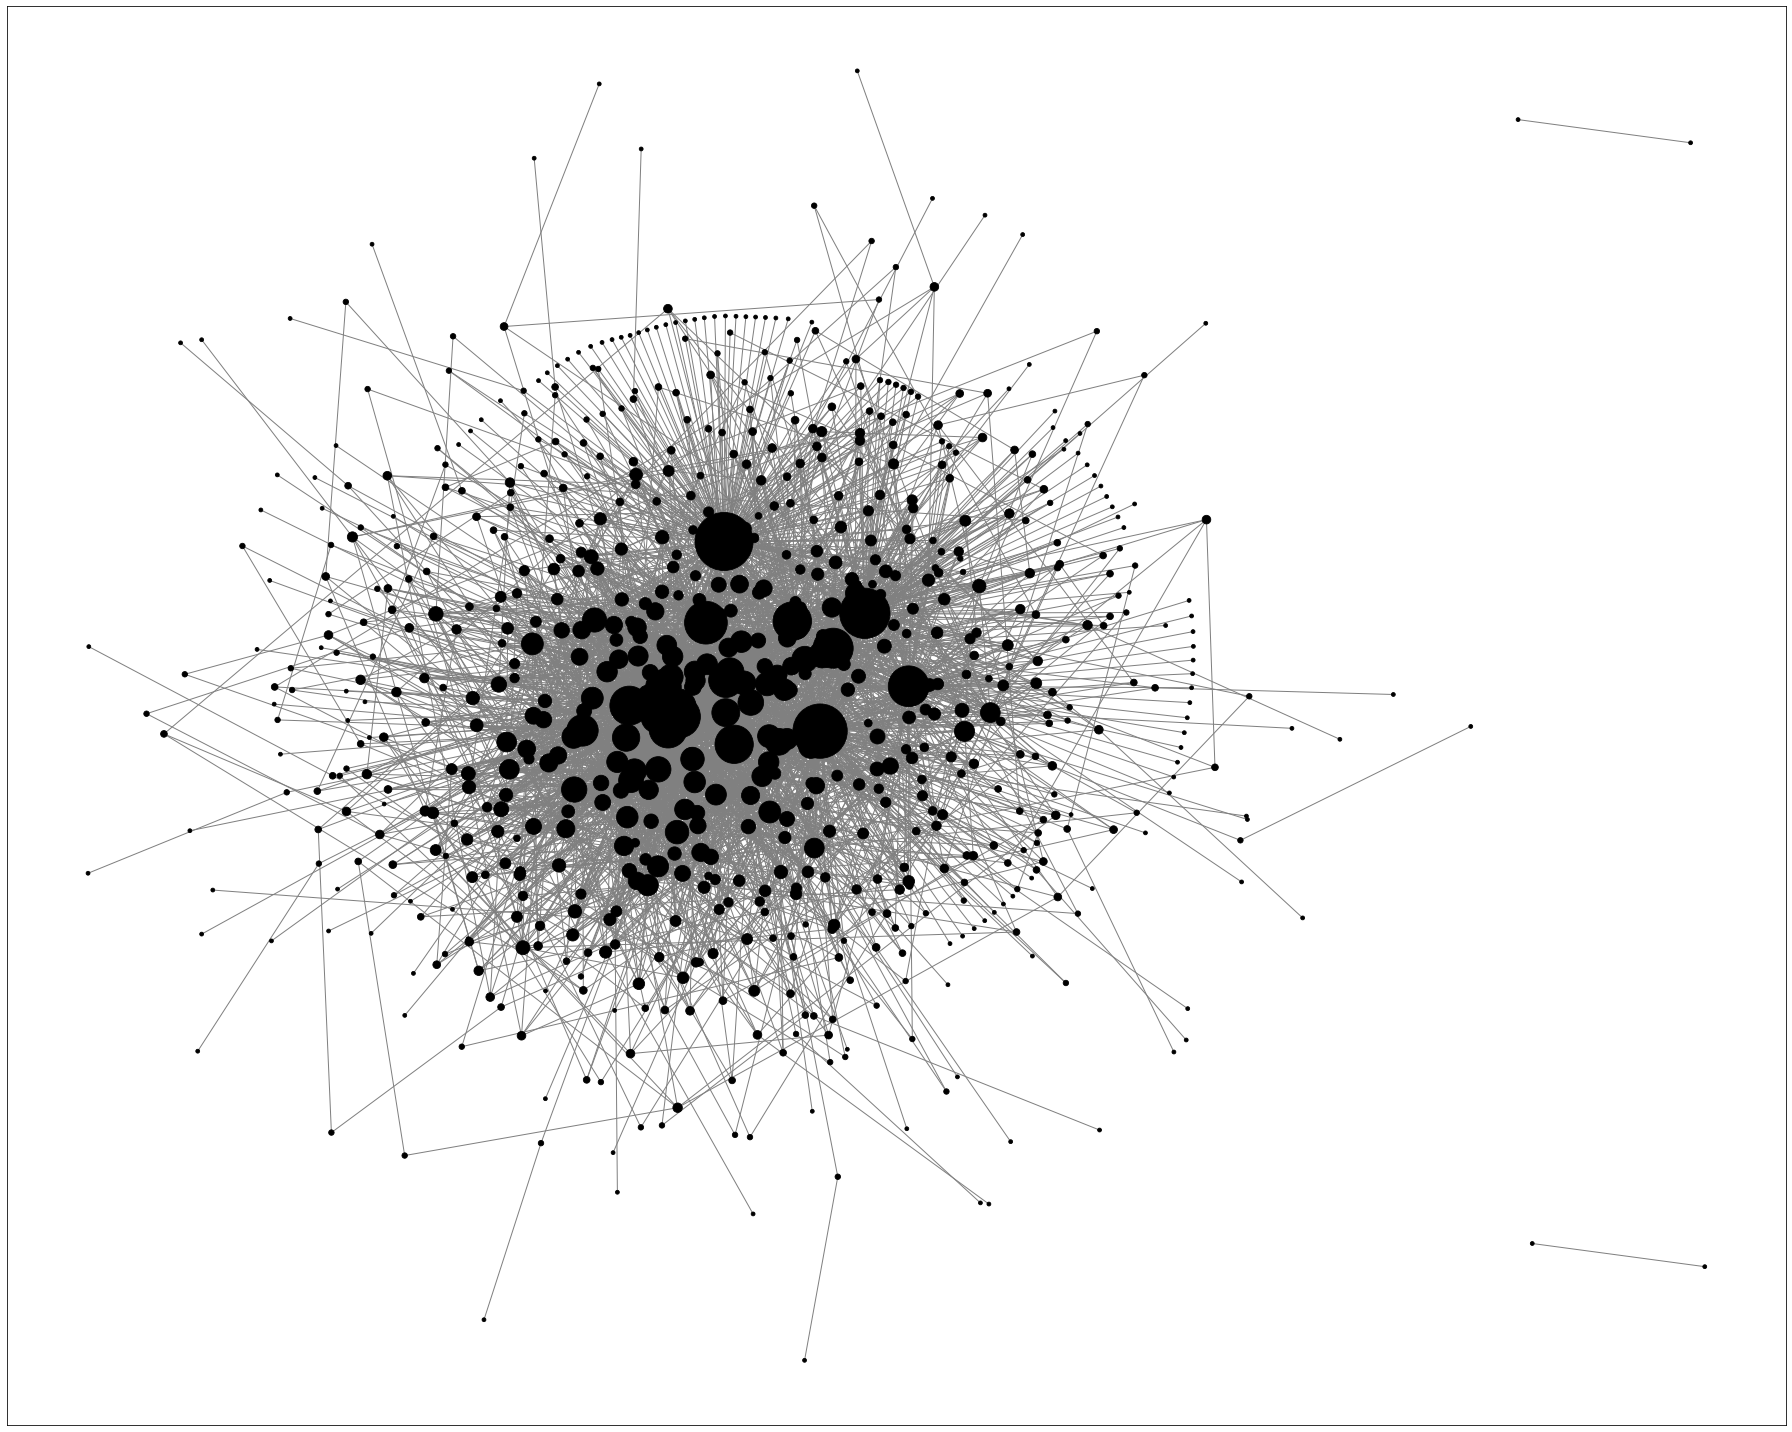

In [5]:
G_normal = nx.from_pandas_edgelist(normal_data,source='source',target='target',edge_attr=['weight'])

uncoman = set(normal_nodes['user_id'].unique()) ^ set(G_normal.nodes())

for i in uncoman:
    G_normal.add_node(i)
    
nx.set_node_attributes(G_normal, pd.Series(normal_nodes.racism, index=normal_nodes.user_id).to_dict(), 'racism')
nx.set_node_attributes(G_normal, pd.Series(normal_nodes.sexism, index=normal_nodes.user_id).to_dict(), 'sexism')
nx.set_node_attributes(G_normal, pd.Series(normal_nodes.normal, index=normal_nodes.user_id).to_dict(), 'normal')

G_normal.remove_nodes_from(list(nx.isolates(G_normal)))

plt.figure(num=None, figsize=(25, 20), dpi=None)

#layout=nx.spring_layout(G_normal)
layout=nx.nx_pydot.graphviz_layout(G_normal)

color_map=['black']
node_deg = nx.degree(G_normal)
nx.draw_networkx(
    G_normal,
    node_size=[int(deg[1])*15 for deg in node_deg],
    arrowsize=5,
    linewidths=0.8,
    #width = [i['weight']* for i in dict(G.edges).values()],
    pos=layout,
    edge_color='gray',
    edgecolors='black',
    node_color=color_map,
    with_labels=False
    #font_size=35
    )


plt.tight_layout()
plt.savefig("normal_nw.jpg", format='jpg')

In [159]:
print(nx.info(G_normal))

Name: 
Type: Graph
Number of nodes: 751
Number of edges: 3566
Average degree:   9.4967


In [156]:
deg=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        deg.append(G_normal.degree(i))
    else:
        deg.append(0)   
        
normal_nodes['degree'] = deg

print("Avg. degree:",np.average(deg))

Avg. degree: 7.240609137055838


In [157]:
wt_deg=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        wt_deg.append(G_normal.degree(i,weight='weight'))
    else:
        wt_deg.append(0)   
        
normal_nodes['weighted_degree'] = wt_deg

print("Avg. weighted degree:",np.average(wt_deg))

Avg. weighted degree: 6.734839301106899


In [81]:
closeness_centrality = nx.closeness_centrality(G_normal)

closeness=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        closeness.append(closeness_centrality[i])
    else:
        closeness.append(0)   
        
normal_nodes['closeness_centrality'] = closeness

In [82]:
betweenness_centrality = nx.betweenness_centrality(G_normal)

betweenness=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        betweenness.append(betweenness_centrality[i])
    else:
        betweenness.append(0)   
        
normal_nodes['betweenness_centrality'] = betweenness

In [83]:
import community

part = community.best_partition(G_normal)

In [84]:
community_l=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        community_l.append(part[i])
    else:
        community_l.append(0)   
        
normal_nodes['community'] = community_l

In [86]:
eigenvector_centrality = nx.eigenvector_centrality(G_normal)

eigenvector=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        eigenvector.append(eigenvector_centrality[i])
    else:
        eigenvector.append(0)   
        
normal_nodes['eigenvector_centrality'] = eigenvector

In [87]:
hubs, authorities = nx.hits(G_normal, max_iter = 1000, normalized = True) 

hubs_l=[]
authorities_l = []

for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        hubs_l.append(hubs[i])
        authorities_l.append(authorities[i])
    else:
        hubs_l.append(0)
        authorities_l.append(0)   
        
normal_nodes['hubs'] = hubs_l
normal_nodes['authorities'] = authorities_l

In [110]:
# modularity 
    
mod = community.modularity(part,G_normal)
mod

0.3277891588596516

In [154]:
# connected components

# If your Graph has more than one component, this will return False:
print(nx.is_connected(G_normal))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G_normal)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G_normal.subgraph(largest_component)
diameter = nx.diameter(subgraph)
radius = nx.radius(subgraph)
avg_path = nx.average_shortest_path_length(subgraph)

print("Network diameter of largest component:", diameter)
print("Network radius of largest component:", radius)
print("Network average shortest path length of largest component:", avg_path)


print("Components:")
[len(c) for c in sorted(nx.connected_components(G_normal), key=len, reverse=True)]

False
Network diameter of largest component: 7
Network radius of largest component: 4
Network average shortest path length of largest component: 2.8556585591696546
Components:



[747, 2, 2]

In [155]:
# No. triangles
number_of_triangles = sum(nx.triangles(G_normal).values()) / 3

print("number of triangles:", number_of_triangles)

number of triangles: 6449.0


In [111]:
# density

density = nx.density(G_normal)
print("Network density:", density)

Network density: 0.012662228140257435


In [114]:
# triadic closure

triadic_closure = nx.transitivity(G_normal)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.11716294533364824


In [91]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html4

clustering = nx.clustering(G_normal)

clustering_l=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        clustering_l.append(clustering[i])
    else:
        clustering_l.append(0)   
        
normal_nodes['clustering'] = clustering_l

In [96]:
pr = nx.pagerank(G_normal, alpha=0.9)

pr_l=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        pr_l.append(pr[i])
    else:
        pr_l.append(0)   
        
normal_nodes['pageRank'] = pr_l

In [99]:
triangles = nx.triangles(G_normal)

triangles_l=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        triangles_l.append(triangles[i])
    else:
        triangles_l.append(0)   
        
normal_nodes['triangles'] = triangles_l

In [127]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G_normal)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

In [129]:
modularity_l=[]
for i in normal_nodes['user_id']:
    if i in G_normal.nodes():
        modularity_l.append(modularity_dict[i])
    else:
        modularity_l.append(0)   
        
normal_nodes['greedy_modularity_communities'] = modularity_l

In [130]:
normal_nodes

,racism,sexism,normal,user_id,abuse,degree,closeness_centrality,betweenness_centrality,community,eigenvector_centrality,hubs,authorities,weighted_degree,clustering,pageRank,triangles,greedy_modularity_communities
0,0.0,0.000636,0.002418,2105021,0.000636,53,0.455787,0.009706,7,0.116395,7.377361e-03,7.377361e-03,51.008086,0.198113,0.006589,273,1
1,0.0,0.000000,0.000127,3236121,0.000000,11,0.350341,0.001169,15,0.010498,6.949953e-04,6.949953e-04,11.000000,0.145455,0.001607,8,0
2,0.0,0.000000,0.000127,8018342,0.000000,2,0.310599,0.000076,7,0.002676,1.724868e-04,1.724868e-04,2.000000,0.000000,0.000624,0,1
3,0.0,0.000000,0.000254,8532872,0.000000,3,0.368615,0.000000,4,0.017000,1.148199e-03,1.148199e-03,3.000000,1.000000,0.000510,3,0
4,0.0,0.000000,0.000636,9444022,0.000000,7,0.385666,0.000151,2,0.023382,1.578215e-03,1.578215e-03,7.000000,0.476190,0.001045,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.0,0.000127,0.000127,3063697555,0.000127,9,0.384069,0.000242,7,0.031493,2.076227e-03,2.076227e-03,9.000000,0.472222,0.001250,17,1
981,0.0,0.000127,0.000763,3063966541,0.000127,4,0.372127,0.000069,7,0.017957,1.178780e-03,1.178780e-03,4.000000,0.500000,0.000640,3,2
982,0.0,0.000000,0.000127,3066306967,0.000000,2,0.351170,0.000076,1,0.007312,4.545655e-04,4.545655e-04,1.002695,0.000000,0.000279,0,3
983,0.0,0.000000,0.000127,3068552947,0.000000,3,0.351836,0.000296,2,0.007845,2.356205e-04,2.356205e-04,1.005391,0.000000,0.000274,0,1


In [139]:
cliques = nx.find_cliques(G_normal)

In [140]:
cliques4 = [clq for clq in cliques if len(clq) >= 1]

In [141]:
cliques4

[[137611265, 1093638847, 1523549617],
 [137611265, 1093638847, 412180717],
 [2200418306, 130417544, 704903653],
 [2200418306, 3017288564],
 [2200418306, 873461084],
 [19580931, 1965776832],
 [19580931, 157996080, 31069840, 23935607],
 [19580931, 157996080, 79459832],
 [19580931, 103845812, 20644420],
 [19580931, 103845812, 170276973],
 [19580931, 19707925, 2710541450],
 [19580931, 23935607, 31069840, 2710541450, 170276973],
 [19580931, 590023803, 31069840, 2710541450, 23411203],
 [19580931, 590023803, 31069840, 2710541450, 170276973],
 [19580931, 590023803, 340376505, 79459832, 20644420],
 [19580931, 590023803, 340376505, 79459832, 170276973],
 [19580931, 590023803, 340376505, 162266849, 138294089],
 [19580931, 590023803, 340376505, 162266849, 2710541450, 170276973],
 [19580931, 590023803, 340376505, 162266849, 20644420],
 [19580931, 590023803, 340376505, 23411203, 2710541450],
 [19580931, 590023803, 187138183, 23411203],
 [19580931, 590023803, 187138183, 20644420],
 [19580931, 5615967

In [158]:
normal_nodes.to_csv("normal_graph_data.csv",index=False)